# **Project Overview**

In response to the growing trend of major companies producing original video content, our organization has decided to establish a new movie studio. However, we face a significant challenge: our team lacks expertise in film production and the intricate dynamics of the movie industry.

To navigate this landscape successfully, we have been tasked with conducting a thorough exploration of datasets on the performance of various films. This analysis will involve exploratory data analysis (EDA) techniques to uncover insights related to genres,budget,release timing and audience ratings.

Our findings will be transformed into actionable insights that will provide the new movie studio with specific recommendations on which types of films to focus on for production. By making data-driven decisions, we aim to equip our new studio for success in the competitive film industry.


### **Key Objectives**
1.**Identify Top-Performing Genres:** Analyze box office data to determine which genres have consistently performed well.

**2. Understand Audience Preferences:** Examine audience ratings and reviews to gauge viewer sentiment and preferences.

**3. Evaluate Budget Efficiency:** Investigate the relationship between production budgets and box office gross to identify optimal investment levels.

**4. Determine Optimal Release Timing:** Analyze seasonal trends and specific release dates to identify the best times to launch films for maximum box office success.

**5. Analyze Profit Trends of Movies Over Time:**Provide insights into the evolving landscape of movie profitability.

**6. Provide Strategic Recommendations:** Develop a set of actionable recommendations for the types of films to produce, based on data-driven insights.


### Business Problem

Your company now sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.

You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.


# Data Preparation

In [426]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 **Loading First Data (Movie Budget)**

In [427]:
## Loading Movie Budgets Data
df2 = pd.read_csv('/content/tn.movie_budgets.csv')
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**Loading Second Data (IMDB)**

In [428]:
#Unzip the database
import zipfile
with zipfile.ZipFile('/content/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [429]:
# Load the SQLite database
import sqlite3
conn = sqlite3.connect('/content/im.db')
df3 = pd.read_sql_query("SELECT * FROM movie_basics JOIN movie_ratings USING (movie_id);", conn)
df3.head()



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [430]:
# Renaming columns in movie_basics for better clarity
df3.rename(columns={'start_year' : 'year'}, inplace=True)
df3.head()

,movie_id,primary_title,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [431]:
#Renaming columns in movie basics for bettter clarity
df2.rename(columns={'movie' : 'primary_title'}, inplace=True)
df2.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**MERGING THE DATAFRAMES:** We merged the dataframes so that we can have enough data to work with for a conclusive analysis.

In [432]:
#Merge Dataframe by Primary Title
merged_df2 = pd.merge(df2, df3, on='primary_title', how='inner')
merged_df2.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Abatâ,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926


In [433]:
# Change df2, release dates
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['year'] = df2['release_date'].dt.year
df2.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [434]:
#Checking null values in merged_df2
null_counts = merged_df2.isnull().sum()
print(null_counts)
print (merged_df2.shape)

id                     0
release_date           0
primary_title          0
production_budget      0
domestic_gross         0
worldwide_gross        0
movie_id               0
original_title         0
year                   0
runtime_minutes      118
genres                 8
averagerating          0
numvotes               0
dtype: int64
(2875, 13)


# Data Cleaning

In [435]:
#Inspection of the dataframe
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2875 non-null   int64  
 1   release_date       2875 non-null   object 
 2   primary_title      2875 non-null   object 
 3   production_budget  2875 non-null   object 
 4   domestic_gross     2875 non-null   object 
 5   worldwide_gross    2875 non-null   object 
 6   movie_id           2875 non-null   object 
 7   original_title     2875 non-null   object 
 8   year               2875 non-null   int64  
 9   runtime_minutes    2757 non-null   float64
 10  genres             2867 non-null   object 
 11  averagerating      2875 non-null   float64
 12  numvotes           2875 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 292.1+ KB


We changed columns with cash values to integers to ensure that the data type accurately reflects the nature of our data type.

In [436]:
#Changing columns with cash values to integers
columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_convert:
    # Applying pd.to_numeric to each column individually
    merged_df2[column] = pd.to_numeric(merged_df2[column].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2875 non-null   int64  
 1   release_date       2875 non-null   object 
 2   primary_title      2875 non-null   object 
 3   production_budget  2875 non-null   int64  
 4   domestic_gross     2875 non-null   int64  
 5   worldwide_gross    2875 non-null   int64  
 6   movie_id           2875 non-null   object 
 7   original_title     2875 non-null   object 
 8   year               2875 non-null   int64  
 9   runtime_minutes    2757 non-null   float64
 10  genres             2867 non-null   object 
 11  averagerating      2875 non-null   float64
 12  numvotes           2875 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 292.1+ KB


We changed the release date format to standardize it, so as to ensure consistency across the dataset, making it easier to analyze and compare.

In [437]:
#Changing the release date format
merged_df2['release_date'] = pd.to_datetime(merged_df2['release_date'])
merged_df2['release_date'] = merged_df2['release_date'].dt.strftime('%Y-%m-%d')
merged_df2.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,Abatâ,2011,93.0,Horror,6.1,43
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926


In [438]:
#Checking for duplicate values
duplicate_rows = merged_df2[merged_df2.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, release_date, primary_title, production_budget, domestic_gross, worldwide_gross, movie_id, original_title, year, runtime_minutes, genres, averagerating, numvotes]
Index: []


In [439]:
#Checking value count in year column
merged_df2['year'].value_counts()

,count
year,
2014,378
2015,354
2013,337
2011,330
2016,314
2010,313
2012,311
2017,246
2018,219


We are dropping irrelevant columns that don't contribute to our analysis and model to reduce clutter and simplify data interpretation.

In [440]:
#Dropping unused columns
merged_df2.drop(['movie_id', 'original_title', 'runtime_minutes'], axis=1, inplace=True)
merged_df2.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,year,genres,averagerating,numvotes
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2011,Horror,6.1,43
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,"Action,Adventure,Fantasy",6.6,447624
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,"Action,Adventure,Sci-Fi",6.0,24451
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,"Action,Adventure,Sci-Fi",7.3,665594
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,"Action,Adventure,Sci-Fi",8.5,670926


We imputed the missing values in genre column because we wanted to retain all the values in the column as it's imortant in our analysis

In [441]:
#Imputing genre with mode
merged_df2['genres'].fillna(merged_df2['genres'].mode()[0], inplace=True)
merged_df2.head()

<ipython-input-441-5bac46e7e622>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df2['genres'].fillna(merged_df2['genres'].mode()[0], inplace=True)


,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,year,genres,averagerating,numvotes
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2011,Horror,6.1,43
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,"Action,Adventure,Fantasy",6.6,447624
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,"Action,Adventure,Sci-Fi",6.0,24451
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,"Action,Adventure,Sci-Fi",7.3,665594
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,"Action,Adventure,Sci-Fi",8.5,670926


# EXPLORATORY DATA ANALYSIS

1.**Identify Top-Performing Genres**: Analyze box office data to determine which genres have consistently performed well. Measuring a genres success with respect to it's profitability.


In [442]:
#Identifying top-performing genres
top_genres = merged_df2['genres'].value_counts().head(10)
print(top_genres)




genres
Drama                         327
Documentary                   126
Comedy                        108
Comedy,Drama                   93
Drama,Romance                  77
Comedy,Drama,Romance           75
Adventure,Animation,Comedy     73
Horror                         63
Comedy,Romance                 59
Action,Adventure,Sci-Fi        58
Name: count, dtype: int64


In [443]:
#Calculating profits
merged_df2['profit'] = merged_df2['worldwide_gross'] - merged_df2['production_budget']
merged_df2.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,year,genres,averagerating,numvotes,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2011,Horror,6.1,43,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,"Action,Adventure,Fantasy",6.6,447624,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,"Action,Adventure,Sci-Fi",6.0,24451,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,"Action,Adventure,Sci-Fi",7.3,665594,1072413963
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,"Action,Adventure,Sci-Fi",8.5,670926,1748134200


In [444]:
#Grouping by genre and summing the profits
genre_profits = merged_df2.groupby('genres')['profit'].sum().sort_values(ascending=False)
print(genre_profits)

genres
Action,Adventure,Sci-Fi        25434152015
Adventure,Animation,Comedy     20347160147
Action,Adventure,Fantasy        8711757789
Drama                           8099013940
Action,Adventure,Comedy         7068300318
                                  ...     
Crime,Drama,History              -64170689
Biography,Crime,Documentary      -67180792
Action,Family,Fantasy            -69533984
Action,Crime,Fantasy             -90000000
Drama,History                   -115436770
Name: profit, Length: 311, dtype: int64


In [445]:
#Sort by profit in descending order
sorted_genres = genre_profits.sort_values(ascending=False)
print(sorted_genres)

genres
Action,Adventure,Sci-Fi        25434152015
Adventure,Animation,Comedy     20347160147
Action,Adventure,Fantasy        8711757789
Drama                           8099013940
Action,Adventure,Comedy         7068300318
                                  ...     
Crime,Drama,History              -64170689
Biography,Crime,Documentary      -67180792
Action,Family,Fantasy            -69533984
Action,Crime,Fantasy             -90000000
Drama,History                   -115436770
Name: profit, Length: 311, dtype: int64


**Extracting and Visualizing Top Ten Most Profitable Genres**

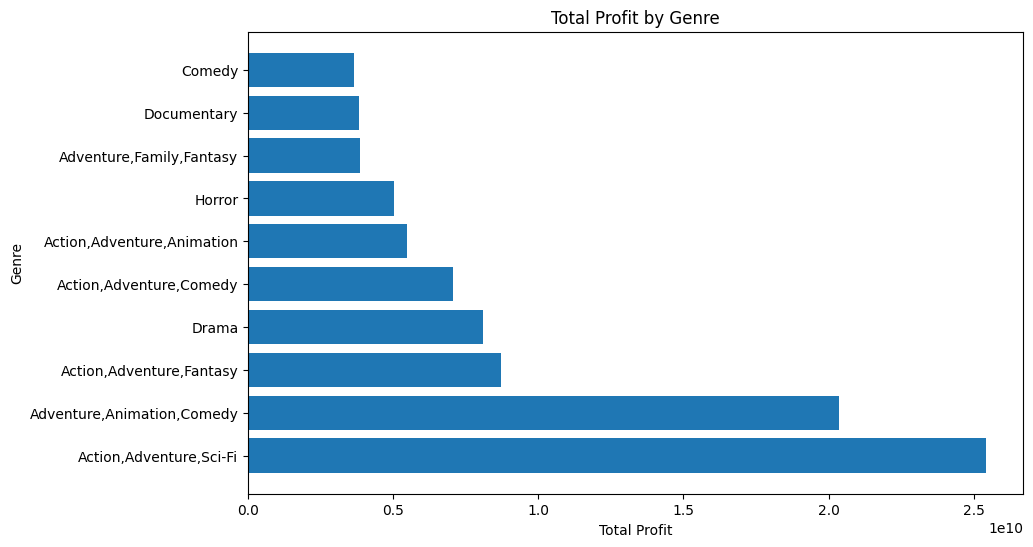

In [446]:
# Extracting top ten most profitable genres
first_ten = genre_profits.head(10).reset_index()
# Rename the columns for easier plotting
first_ten.columns = ['genre', 'total_profit']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(first_ten['genre'], first_ten['total_profit'])
plt.xlabel('Total Profit')
plt.ylabel('Genre')
plt.title('Total Profit by Genre')
plt.show()

The bar graph clearly illustrates that the 'Action, Adventure, Sci-Fi' genre is the most profitable, significantly outpacing other categories, with the 'Adventure, Animation, Comedy' genre following closely behind. This substantial difference emphasizes the dominance of 'Action, Adventure, Sci-Fi' in terms of financial returns. Given these insights, we strongly recommend that investors focus their efforts and resources on this genre when launching the new studio, as aligning with market trends and consumer preferences will likely enhance the studio's potential for success and profitability in a competitive landscape.

**2. Understand Audience Preferences**: Examine audience ratings  to gauge viewer sentiment and preferences.

In [447]:
#Checking which genre is prefered by the audience
genre_ratings = merged_df2.groupby('genres')['averagerating'].mean().sort_values(ascending=False)


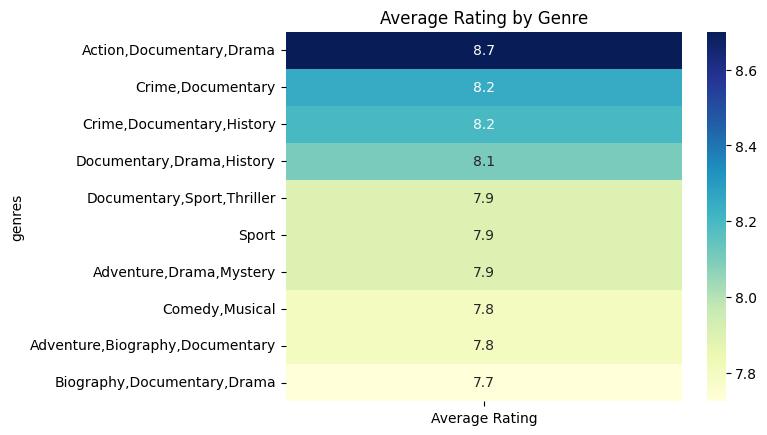

In [448]:
#Creating dataframe
data =  merged_df2.groupby('genres') ['averagerating'].mean().sort_values(ascending=False).head(10)
data = pd.DataFrame(data)
data = data.reset_index()

# Set genres as the index to use it as row labels in the heatmap
data.set_index(['genres'], inplace=True)

# Plot the heatmap
sns.heatmap(data, cmap='YlGnBu', annot=True, cbar=True,
            xticklabels=['Average Rating'], yticklabels=data.index)
plt.title('Average Rating by Genre')
plt.show()


The heat map analysis reveals that the genres of action, documentary, drama, crime, and history emerge as the most highly preferred and best-rated by audiences, indicating a clear alignment with viewer interests and preferences. This data suggests a strong demand for content that not only entertains but also engages audiences on a deeper level, particularly in genres that provoke thought and evoke emotional responses. To capitalize on this insight, we recommend that investors consider hiring personnel with expertise in these specific genres, as well as those who understand the nuances of audience engagement within these categories. By focusing on talent that can craft compelling narratives and high-quality productions, the studio can effectively resonate with its target demographic, thereby maximizing viewer engagement and, ultimately, enhancing its competitive edge in the market. This strategic approach will be essential in building a loyal audience base and driving long-term profitability.


**3.Evaluate Budget Efficiency:** Investigate the relationship between production budgets and worldwide gross to identify optimal investment levels.

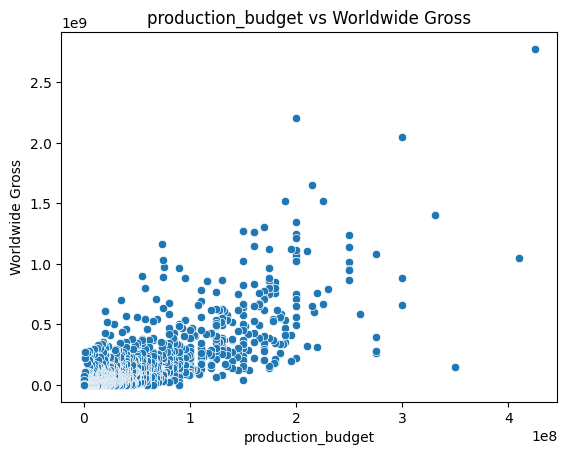

In [449]:
#Plotting
sns.scatterplot(merged_df2, x='production_budget', y='worldwide_gross')
plt.title('production_budget vs Worldwide Gross')
plt.xlabel('production_budget')
plt.ylabel('Worldwide Gross')
plt.show()


This scatter plot illustrates the relationship between production budget and worldwide gross revenue for various movies. There is a positive correlation, where higher production budgets are generally associated with higher worldwide gross revenue. This relationship is moderately strong; although there’s some variability, a clear trend emerges, particularly as budgets increase. A few outliers stand out, especially one movie with significantly higher worldwide gross than the rest, likely indicating a blockbuster. There are also a few points with extreme gross values for given budgets. Most data points are clustered around lower budget and gross values, indicating that the majority of films have smaller budgets and revenue compared to top-performing movies. To maximize revenue, the investors should invest in higher-budget films with caution, as not all yield significant returns. It's essential to consider factors like genre, marketing, and audience appeal. A balanced strategy that includes both high-budget and lower-budget films with moderate return potential can help diversify risk while targeting high-grossing successes.

**4. Determine Optimal Release Timing:** Analyze seasonal trends and specific release dates to identify the best times to launch films for maximum box office success.

In [450]:
#Confirming release date type
merged_df2['release_date'] = pd.to_datetime(merged_df2['release_date'])
merged_df2['release_date'].dtype

dtype('<M8[ns]')

In [451]:
# Create a new column for month
merged_df2['month'] = merged_df2['release_date'].dt.month
merged_df2.head()

# Define a function to categorize months into seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new 'season' column
merged_df2['season'] = merged_df2['month'].apply(get_season)

In [452]:
# Group by season and calculate total box office revenue
season_sales = merged_df2.groupby('season')['worldwide_gross'].sum().reset_index()

# Sort by box office revenue
season_sales = season_sales.sort_values(by='worldwide_gross', ascending=False)
print(season_sales)

   season  worldwide_gross
2  Summer      83426241370
1  Spring      80447328711
3  Winter      66068437245
0    Fall      65932991667


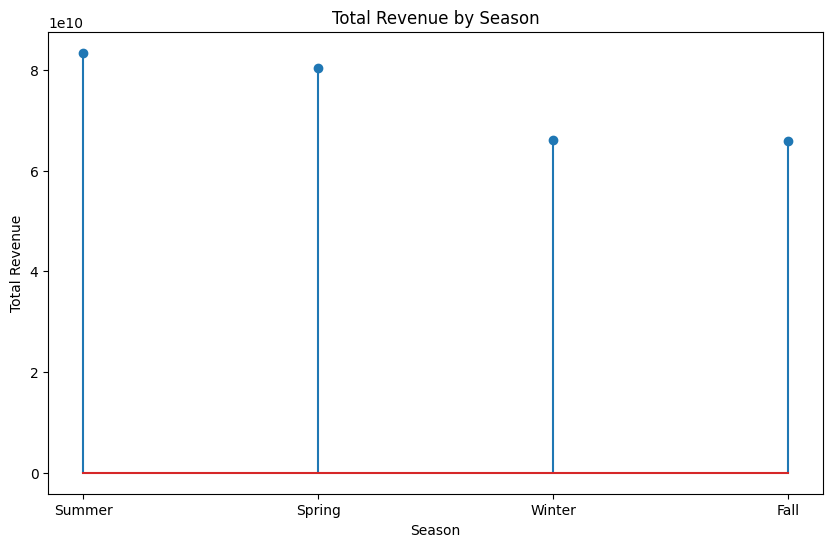

In [453]:
#Plotting
plt.figure(figsize=(10, 6))
plt.stem(season_sales['season'], season_sales['worldwide_gross'])
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Season')
plt.show()

The stem plot illustrates total revenue by season—Summer, Spring, Winter, and Fall. Notably, Summer stands out as the season with the highest revenue, reflecting increased movie attendance during this time. In contrast, Spring, Winter, and Fall show comparable revenues, all significantly lower than those of Summer. This marked difference highlights the substantial seasonal influence on movies performance, with Summer being the peak period for earnings. Therefore, the new studio will benefit from strategically releasing major films in the Summer to optimize their revenue potential.

**5. Analyze Profit Trends of Movies Over Time:** Provide insights into the evolving landscape of movie profitability.

In [454]:
#Confirming release date time
merged_df2['release_date'] = pd.to_datetime(merged_df2['release_date'])

In [455]:
# Extract year from release_date
merged_df2['year'] = merged_df2['release_date'].dt.year

In [456]:
# Group by year and calculate total profit
profit_trends = merged_df2.groupby('year')['profit'].mean().reset_index()

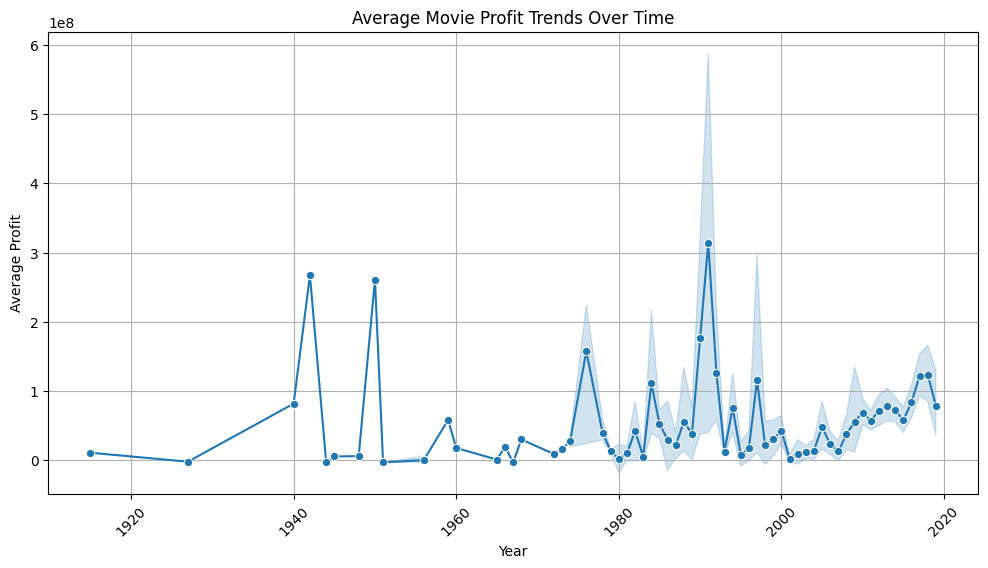

In [457]:
#Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_df2['year'], y=merged_df2['profit'], data=profit_trends, marker='o')
plt.title('Average Movie Profit Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.grid()
plt.show()

The line plot illustrates trends in average movie profits from 1920 to 2020, with years on the x-axis and average profits represented in hundreds of millions on the y-axis. Notable peaks occur in 1940, 1950, 1980, and 1990, with the most pronounced increase seen around 1980. The shaded area surrounding the line reflects variability and confidence intervals, highlighting significant fluctuations, especially during the 1980s. Following the 2000s, there is a more stable upward trajectory in movie profits. This analysis not only reveals historically profitable periods but also offers valuable insights into profit fluctuations over the century. The investors should focus on historical trends, particularly targeting periods of high profitability like the 1980s, to enhance success chances. It's essential to remain adaptable to market fluctuations and diversify genres to mitigate risks. Leveraging these insights can help investors make informed decisions aligned with market trends.

# LINEAR REGRESSION

In [458]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Select Variables
X = merged_df2[['production_budget']] #independent variable
y = merged_df2['profit'] #dependent variable

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a linear regression model
model = LinearRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

#display the intercept
print(model.intercept_)

#display the coefficients
print(model.coef_)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f'R-squared : {r2}')



-11978315.942415789
[2.31452646]
Mean Squared Error: 2.053981199591411e+16
R-squared : 0.33445251201509896


In [459]:
#Createing a comparison dataframe
comparison_df = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred})
print(comparison_df)


      Actual Profit  Predicted Profit
729       115011165      8.060274e+07
2434         419669     -7.349263e+06
1289       19686769      3.431221e+07
1740      108514727      1.116695e+07
937        85150424      5.745748e+07
...             ...               ...
1886       -6999907      8.852422e+06
163        37393899      2.956223e+08
1916       33334735      6.537896e+06
252       143388614      2.194743e+08
1803       -5309198      1.116695e+07

[575 rows x 2 columns]


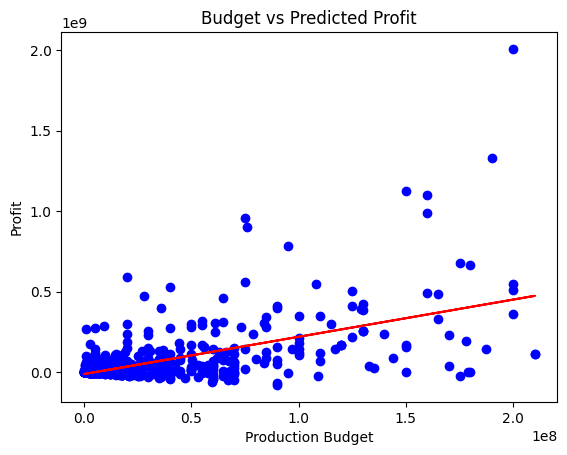

In [460]:
#Visualization
plt.scatter(X_test, comparison_df['Actual Profit'], color='blue',)
plt.plot(X_test, comparison_df['Predicted Profit'], color='red')
plt.title('Budget vs Predicted Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.show()



The scatter plot titled "Budget vs Predicted Profit" explores the relationship between production budgets, ranging from 0 to 200 million on the x-axis, and profits, which can reach up to 2 billion on the y-axis. Each blue dot represents an individual data point, reflecting the profit associated with a specific production budget. A red trend line indicates a positive correlation, implying that, overall, higher production budgets are typically associated with greater profits. However, the plot also reveals significant outliers, suggesting that some low-budget films can achieve impressive profits, while certain high-budget films may underperform. Investors should note that, although higher production budgets typically lead to greater profits, there are notable exceptions. This presents an opportunity to invest in lower-budget films that can yield significant returns. A balanced strategy that includes both high- and low-budget projects can reduce risk while enhancing profit potential. Additionally, focusing on genres and audience preferences will increase the chances of success. By adopting this approach, investors can effectively leverage the strengths of both budget tiers in their portfolios.





# RECOMMENDATIONS
Based on the analysis of key objectives and observations, we recommend the following strategies for maximizing the success of the new movie studio:

**1.Focus on Profitable Genres:** Given that the 'Action, Adventure, Sci-Fi' genre significantly outperforms others in profitability, investors should prioritize films in these categories. Aligning with market trends and audience preferences will enhance the studio's potential for financial success.

**2. Engage Expertise in Preferred Genres:** The heat map analysis indicates strong audience preferences for genres such as action, documentary, drama, crime, and history. Hiring talent with expertise in these areas will allow the studio to create compelling narratives that resonate deeply with viewers, thereby boosting engagement and loyalty.

**3. Balanced Budget Strategy:** While higher production budgets often correlate with increased profits, variability exists. Investors should pursue a mix of high- and low-budget films to diversify risk. This approach will enable the studio to capitalize on blockbuster potential while also exploring lower-budget projects that may yield significant returns.

**4. Timing Releases Strategically:** The stem plot highlights Summer as the peak season for box office revenue. To optimize revenue potential, the studio should plan major film releases during this season, taking advantage of increased audience attendance.

**5. Leverage Historical Profit Trends:** Analysis of profit trends from 1920 to 2020 reveals valuable insights. Investors should target periods of historically high profitability, such as the 1980s, while remaining adaptable to changing market conditions and diversifying genres to mitigate risks.

**6. Monitor Audience Engagement:** Continuously analyze audience ratings and reviews to understand viewer sentiment. This feedback will be crucial in refining content strategies and ensuring that the studio aligns its offerings with audience interests.

By implementing these recommendations, investors can enhance the studio's competitive edge and drive long-term profitability in the dynamic film industry.



